# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset_pd = pd.read_csv('car_data.csv', delimiter=',', header=None)
dataset = dataset_pd.values

data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,753,91,36,72,162,60,8,150,44,19,133,166,334,121,63,2,22,196,205
1,719,104,53,101,199,65,11,213,31,24,168,216,667,221,72,12,12,187,198
2,686,88,40,69,146,59,7,130,51,18,134,147,252,144,64,1,1,193,200
3,749,93,51,90,209,69,8,183,36,22,156,211,506,230,70,6,1,189,196
4,102,94,42,68,150,64,7,128,52,18,143,154,246,159,69,14,5,192,196


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000
mean,426.442623,94.021858,45.081967,82.661202,169.387978,61.540984,8.561020,170.083789,40.683060,20.693989,148.444444,189.861566,446.675774,175.389800,72.451730,6.45173,12.785064,188.823315,195.557377
std,244.747179,8.289002,6.192666,15.644020,33.893036,8.140456,4.510573,33.899975,7.843456,2.651466,14.497014,32.094735,180.992521,32.285863,7.371771,4.94384,8.941888,6.041200,7.417852
min,1.000000,77.000000,33.000000,44.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,132.000000,192.000000,109.000000,59.000000,0.00000,0.000000,176.000000,181.000000
25%,213.000000,88.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,138.000000,168.000000,320.000000,150.000000,68.000000,2.00000,6.000000,185.000000,190.000000
50%,428.000000,93.000000,45.000000,81.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,180.000000,367.000000,174.000000,71.000000,5.00000,11.000000,188.000000,197.000000
75%,639.000000,100.000000,50.000000,98.000000,196.000000,65.000000,10.000000,201.000000,46.000000,23.000000,160.000000,218.000000,607.000000,198.000000,75.000000,10.00000,19.000000,193.000000,201.000000
max,845.000000,116.000000,58.000000,110.000000,333.000000,138.000000,55.000000,265.000000,59.000000,29.000000,182.000000,320.000000,1018.000000,264.000000,135.000000,22.00000,41.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import f1_score, accuracy_score
from scikitplot.metrics import plot_roc

<AxesSubplot: >

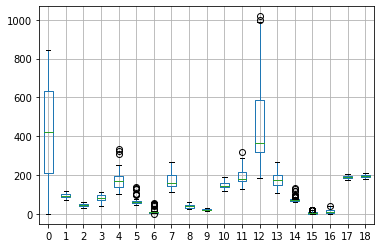

In [7]:
dataset_pd.boxplot(figsize=(15, 15))

In [8]:
#There are definitely outliers in the data
#In this part of the code i get rid of them, by just setting the value to the median

for col_name in dataset_pd.columns[:-1]:
    q1 = dataset_pd[col_name].quantile(0.25)
    q3 = dataset_pd[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1 - 1.5*iqr
    high = q3 + 1.5*iqr
    dataset_pd.loc[(dataset_pd[col_name] < low) | (dataset_pd[col_name] > high), col_name] = dataset_pd[col_name].median()


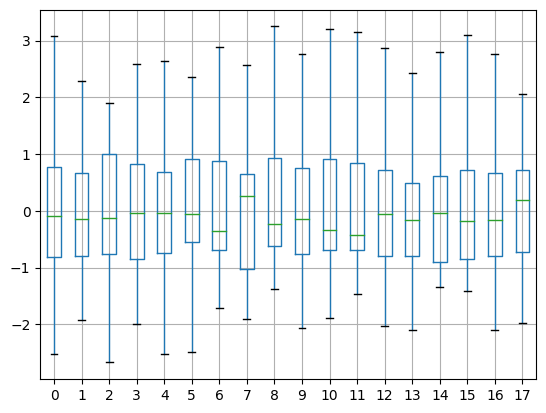

In [9]:
try:
    #drop column 0, as it is just the number of sample, not actual data
    dataset_pd.drop(0, inplace=True, axis=1)
    dataset = dataset_pd.values

    data = dataset[:, :-1].astype(int)
    #Standarizing data
    transformer = StandardScaler().fit(data)
    data = transformer.transform(data)
    data_pd = pd.DataFrame(data)
    data_pd.boxplot()

    target = dataset[:, -1]
    
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)

    X_train = X_train.astype('float64')
    X_test = X_test.astype('float64')
except Exception as err:
    print(err)
#dataset_pd.boxplot()


In [10]:
'''
model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
model.fit(X_train, y_train)

print(data.shape)
importance = model.coef_[0]
for i, rate in enumerate(importance):
    print(i, "-->", rate)

data = np.delete(data, 17, axis=1)
data = np.delete(data, 7, axis=1)
data = np.delete(data, 3, axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)

X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
print(data.shape)
'''

'\nmodel = LogisticRegression(multi_class=\'multinomial\', solver=\'saga\', tol=1e-3, max_iter=500)\nmodel.fit(X_train, y_train)\n\nprint(data.shape)\nimportance = model.coef_[0]\nfor i, rate in enumerate(importance):\n    print(i, "-->", rate)\n\ndata = np.delete(data, 17, axis=1)\ndata = np.delete(data, 7, axis=1)\ndata = np.delete(data, 3, axis=1)\n\nX_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)\n\nX_train = X_train.astype(\'float64\')\nX_test = X_test.astype(\'float64\')\nprint(data.shape)\n'

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [35]:
model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, random_state=1)

#I chose 5 and 50 as boundaries, because C was never taking values bigger than 40, and i set it as 50 just in case...
param_grid = dict(C=np.arange(5, 50, step=2.5)) 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
search = GridSearchCV(estimator = model, param_grid=param_grid, n_jobs=-1, cv=cv, verbose=True)
result_1 = search.fit(X_train, y_train)
print(result_1.best_params_, result_1.best_score_)

model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=result_1.best_params_['C'], random_state=1)
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

print(f"f1 score: {f1_score(y_test, y_predicted, average='macro')}")
print(f"Accuracy score = {accuracy_score(y_test, y_predicted)}")

print('Accuracy on Training data: ',model.score(X_train, y_train))
print('Accuracy on Testing data: ',model.score(X_test , y_test))

Fitting 30 folds for each of 18 candidates, totalling 540 fits
{'C': 35.0} 0.7874186307519639
f1 score: 0.8055265168268264
Accuracy score = 0.8013468013468014
Accuracy on Training data:  0.8287795992714025
Accuracy on Testing data:  0.8013468013468014


<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

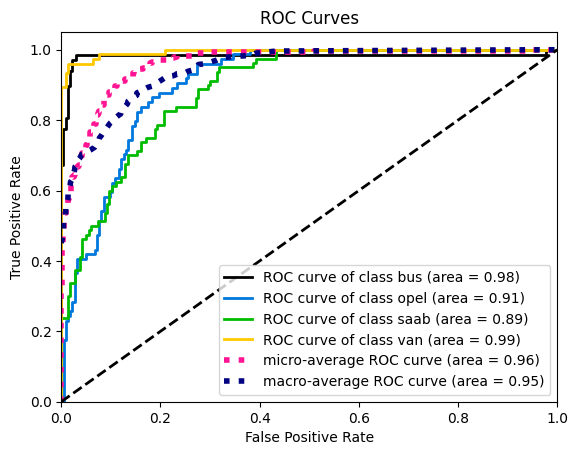

In [12]:
y_proba = model.predict_proba(X_test)

plot_roc(y_test, y_proba)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

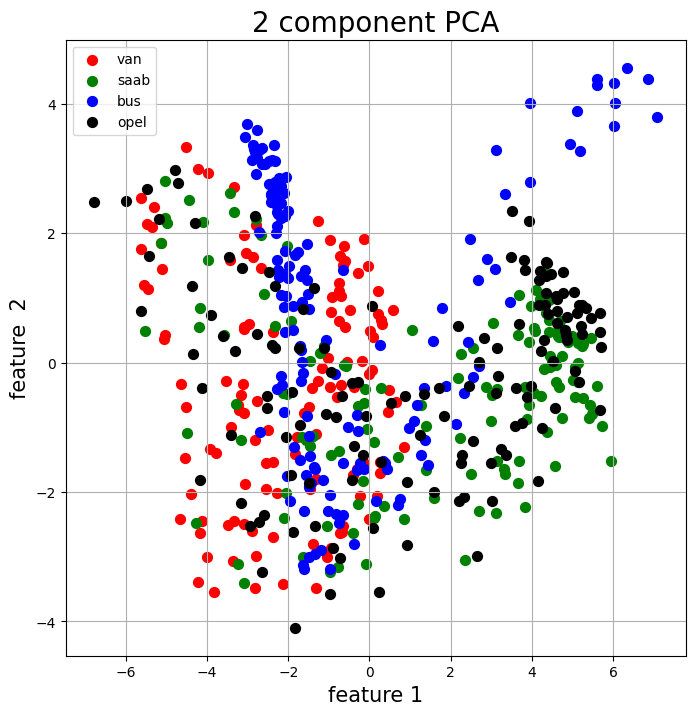

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('feature 1', fontsize = 15)
ax.set_ylabel('feature  2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['van', 'saab', 'bus', 'opel']
colors = ['r', 'g', 'blue', 'black']

train_pd = pd.DataFrame(principalComponents, columns=['feature 1', 'feature 2'])
y_pd = pd.DataFrame(y_train, columns=['target'])
train_pd = pd.concat([train_pd, y_pd], axis=1)

for target, color in zip(targets,colors):
    indicesToKeep = train_pd['target'] == target
    ax.scatter(train_pd.loc[indicesToKeep, 'feature 1']
               , train_pd.loc[indicesToKeep, 'feature 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [14]:
for components in range(2, 18):
    pca = PCA(n_components=components)
    pca.fit(X_train)
    train_transformed = pca.transform(X_train)
    test_data = pca.transform(X_test)

    model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, random_state=1)
    model.fit(train_transformed, y_train)

    y_predicted = model.predict(test_data)

    print(f'Accuracy on Training data components = {components}: ',model.score(train_transformed, y_train))
    print(f'Accuracy on Testing data: components = {components}: ',model.score(test_data , y_test))

#For 12 or 13 components the prediction starts to be almost as good as with 18
#Data should not be normalized, but yes standarized

Accuracy on Training data components = 2:  0.46265938069216755
Accuracy on Testing data: components = 2:  0.4074074074074074
Accuracy on Training data components = 3:  0.46994535519125685
Accuracy on Testing data: components = 3:  0.43434343434343436
Accuracy on Training data components = 4:  0.5391621129326047
Accuracy on Testing data: components = 4:  0.4882154882154882
Accuracy on Training data components = 5:  0.6338797814207651
Accuracy on Testing data: components = 5:  0.6127946127946128
Accuracy on Training data components = 6:  0.6320582877959927
Accuracy on Testing data: components = 6:  0.6363636363636364
Accuracy on Training data components = 7:  0.6648451730418944
Accuracy on Testing data: components = 7:  0.6666666666666666
Accuracy on Training data components = 8:  0.6794171220400729
Accuracy on Testing data: components = 8:  0.6734006734006734
Accuracy on Training data components = 9:  0.73224043715847
Accuracy on Testing data: components = 9:  0.7070707070707071
Accurac

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [15]:
pca = PCA(n_components=13)
pca.fit(X_train)
train_transformed = pca.transform(X_train)
test_data = pca.transform(X_test)

model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, random_state=1)

param_grid = dict(C=np.arange(5, 50, step=2.5)) 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
search = GridSearchCV(estimator = model, param_grid=param_grid, n_jobs=-1, cv=cv, verbose=True)
result = search.fit(train_transformed, y_train)
print(result.best_params_, result.best_score_)

model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=result.best_params_['C'], random_state=1)
model.fit(train_transformed, y_train)

y_predicted = model.predict(test_data)

print(f"f1 score: {f1_score(y_test, y_predicted, average='macro')}")
print(f"Accuracy score = {accuracy_score(y_test, y_predicted)}")

print('Accuracy on Training data: ',model.score(train_transformed, y_train))
print('Accuracy on Testing data: ',model.score(test_data , y_test))

Fitting 30 folds for each of 18 candidates, totalling 540 fits
{'C': 12.5} 0.7491021324354659
f1 score: 0.741176461936393
Accuracy score = 0.7407407407407407
Accuracy on Training data:  0.7905282331511839
Accuracy on Testing data:  0.7407407407407407


#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [16]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()


param_grid = dict(max_depth=range(3, 20)) 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
search = GridSearchCV(estimator = model, param_grid=param_grid, n_jobs=-1, cv=cv, verbose=True)
result_tree = search.fit(X_train, y_train)
print(result_tree.best_params_, result_tree.best_score_)

print(result_tree.best_params_['max_depth'])
model = DecisionTreeClassifier(max_depth = result_tree.best_params_['max_depth'])
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

print(f"f1 score: {f1_score(y_test, y_predicted, average='macro')}")
print(f"Accuracy score = {accuracy_score(y_test, y_predicted)}")
print('Accuracy on Training data: ',model.score(X_train, y_train))

print('Accuracy on Testing data: ',model.score(X_test , y_test))

Fitting 30 folds for each of 17 candidates, totalling 510 fits
{'max_depth': 13} 0.7030415263748596
13
f1 score: 0.6742424242424242
Accuracy score = 0.6666666666666666
Accuracy on Training data:  0.9981785063752276
Accuracy on Testing data:  0.6666666666666666


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

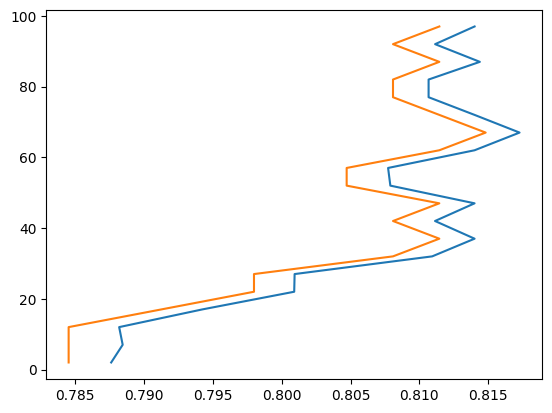

In [17]:
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import make_pipeline

scoref1 = []
score_accu = []
for N in range(2, 100, 5):
    pipeline = make_pipeline(LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=result.best_params_['C'], random_state=1))
    bg_classifier = BaggingClassifier(base_estimator=pipeline, n_estimators=N, random_state=1)

    bg_classifier.fit(X_train, y_train)
    y_predicted = bg_classifier.predict(X_test)
    scoref1.append(f1_score(y_test, y_predicted, average='macro'))
    score_accu.append(accuracy_score(y_test, y_predicted))


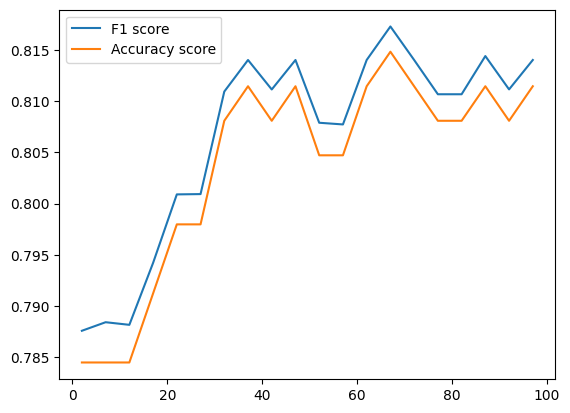

In [22]:
fig, ax = plt.subplots()
ax.plot(range(2, 100, 5), scoref1, label="F1 score")
ax.plot(range(2, 100, 5), score_accu, label="Accuracy score")
print(max(scoref1), np.where(scoref1 == max(scoref1)))
plt.legend()
plt.show()

For N = 67 it reaches a peak, that seems like a good size for the ensemble<br>
Also we can notice that for N=37 it starts to be a good predictor, so we could also take N = 37 as a good size.

In [23]:
scoref1 = []
score_accu = []
for N in range(2, 100, 5):
    pipeline = make_pipeline(DecisionTreeClassifier(max_depth = result_tree.best_params_['max_depth']))
    bg_classifier = BaggingClassifier(base_estimator=pipeline, n_estimators=N, random_state=1)

    bg_classifier.fit(X_train, y_train)
    y_predicted = bg_classifier.predict(X_test)
    scoref1.append(f1_score(y_test, y_predicted, average='macro'))
    score_accu.append(accuracy_score(y_test, y_predicted))

0.7708190852172095 (array([10], dtype=int64),)


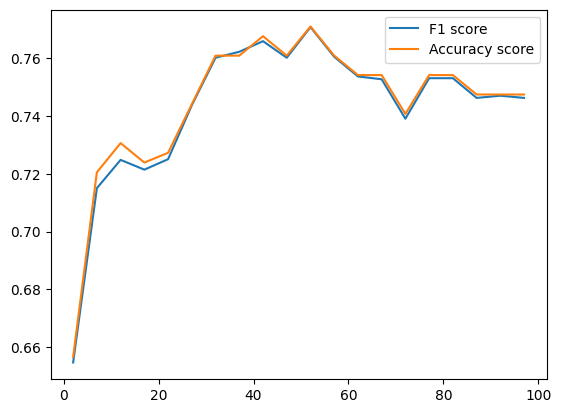

In [25]:
fig, ax = plt.subplots()
ax.plot(range(2, 100, 5), scoref1, label="F1 score")
ax.plot(range(2, 100, 5), score_accu, label="Accuracy score")
print(max(scoref1), np.where(scoref1 == max(scoref1)))

plt.legend()
plt.show()

For N = 52 it reaches the peak.<br>
For the case of the Decission tree, this is a big improvement from the initial prediction of only decision tree.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [26]:
from sklearn.ensemble import RandomForestClassifier

scoref1 = []
score_accu = []
for N in range(5, 100, 5):
    model = RandomForestClassifier(n_estimators=N)

    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    scoref1.append(f1_score(y_test, y_predicted, average='macro'))
    score_accu.append(accuracy_score(y_test, y_predicted))

0.7639545226466904 (array([12], dtype=int64),)


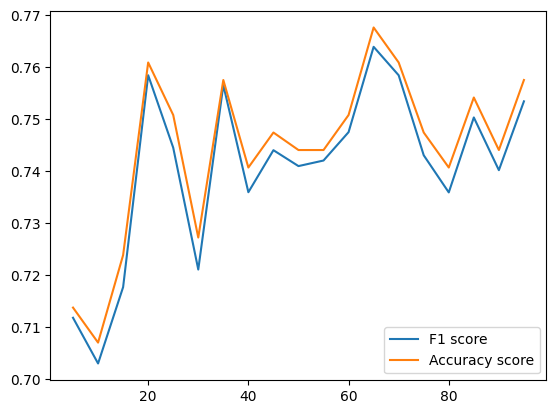

In [28]:
fig, ax = plt.subplots()
ax.plot(range(5, 100, 5), scoref1, label="F1 score")
ax.plot(range(5, 100, 5), score_accu, label="Accuracy score")
print(max(scoref1), np.where(scoref1 == max(scoref1)))

plt.legend()
plt.show()

The results are not too different, but we need a bigger N, to get almost the same accuracy that we use to get with the bagging strategy

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [49]:
splitted = np.split(X_train[:540], 10)
splitted_y = np.split(y_train[:540], 10)

accu_log = []
accu_tre = []
accu_for = []
sizes = np.arange(54, 541, 54)

rf = RandomForestClassifier(n_estimators=67)
dec_t = DecisionTreeClassifier(max_depth = result_tree.best_params_['max_depth'])
log_r = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=result_1.best_params_['C'], random_state=1)

for split_x, split_y in zip(splitted, splitted_y):
    rf.fit(split_x, split_y)
    dec_t.fit(split_x, split_y)
    log_r.fit(split_x, split_y)

    
    y_rf = rf.predict(X_test)
    y_dec = dec_t.predict(X_test)
    y_log = log_r.predict(X_test)

    accu_log.append(accuracy_score(y_test, y_log))
    accu_tre.append(accuracy_score(y_test, y_dec))
    accu_for.append(accuracy_score(y_test, y_rf))
    

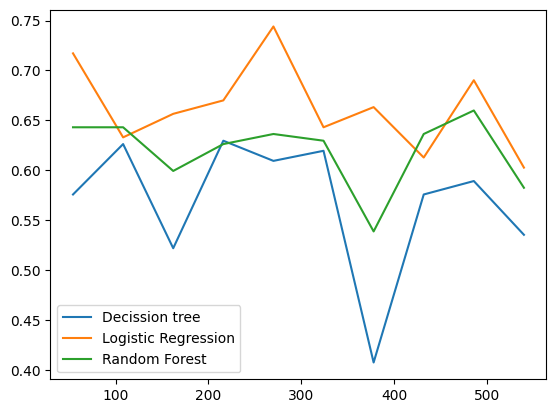

In [50]:
fig, ax = plt.subplots()
ax.plot(sizes, accu_tre, label="Decission tree")
ax.plot(sizes, accu_log, label="Logistic Regression")
ax.plot(sizes, accu_for, label="Random Forest")
#ax.label("Size of training data")
#ax.ylabel("Accuracy of prediction")

plt.legend()
plt.show()

Clearly i did something wrong here... sadly i cant fix it and i must send the HW...
